# Homework 4
### Rachinskiy Maxim 175
#### Variant 9

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Let's import data to analyse

In [2]:
grid = pd.read_csv('data/task_4.csv', sep=';', dtype='float', decimal=',')
data = grid[['midterm_9', 'exam_9', 'female_9']]
data.head()

,midterm_9,exam_9,female_9
0,27.0,92.0,0.0
1,62.0,90.0,1.0
2,29.0,42.0,0.0
3,36.5,65.0,0.0
4,49.0,48.0,0.0


## Subtask 1
Let's get the regression equation based on males

$exam = \beta_1 + \beta_2 * midterm + \epsilon$

In [3]:
lr = LinearRegression()
male_data = [[sample] for sample in data[data['female_9'] == 0.0]['midterm_9']]
male_results = list(data[data['female_9'] == 0.0]['exam_9'])
lr.fit(male_data, male_results)

print('Best params: w = ', lr.coef_, 'b = ', lr.intercept_)

Best params: w =  [0.36224481] b =  40.96774429889807


Now we can calculate coefficient of determination

In [4]:
print('R^2 score: ', r2_score(lr.predict(male_data), male_results))

R^2 score:  -10.638051332393873


## Subtask 2

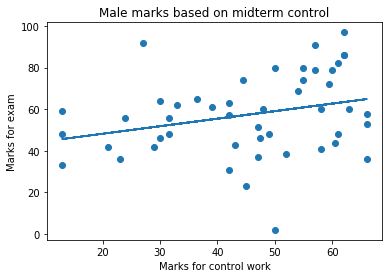

In [5]:
plt.scatter(male_data, male_results)
plt.plot(male_data, lr.predict(male_data))

plt.title('Male marks based on midterm control')
plt.xlabel('Marks for control work')
plt.ylabel('Marks for exam');

## Subtask 3
After that we can test assumptions
We will test significance of correlation with t-statistic:

$H_0: \beta_2 = 0$
$H_1: \beta_2 \neq 0$

$T(x) = \frac{\hat{\beta_j}}{\hat{\delta_{\beta_j}}}$

Approve zone: $[t_{\frac{\alpha}{2};n-k}, t_{1-\frac{\alpha}{2};n-k}]$

$k$ - number of correlators

Firstly let's find $\hat{\delta_{\beta_j}}$

In [6]:
X = np.concatenate(((np.ones((len(male_data), 1)), male_data)), axis=1)
predicted = lr.predict(male_data).T
m, n = X.shape

MSE = np.sum((predicted - male_results)**2) / (m - n)
coef_var_est = MSE * np.diag(np.linalg.pinv(np.dot(X.T,X)))
coef_SE_est = np.sqrt(coef_var_est)

b_2_est = coef_SE_est[1]
print('Std of coef of correlation before midterm:', b_2_est)

Std of coef of correlation before midterm: 0.1822062996900646


Now we can test our assumtion

In [7]:
def test_bidirectional(coef, coef_st, n, k, alfa):
    left = stats.t._ppf(alfa/2, n-k)
    right = stats.t._ppf(1 - alfa/2, n-k)
    statistic = coef / coef_st
    
    return left <= statistic <= right

In [8]:
coef_sign = test_bidirectional(lr.coef_[0], b_2_est, 1, len(data['exam_9']), 0.05)

print('Not significant on 0.95 level' if not coef_sign else 'Significant on 0.95 level')

Not significant on 0.95 level


## Subtask 4

Now let's do similar model building, but based on female data samples

Firstly, let's get the regression equation based on females

$exam = \beta_1 + \beta_2 * midterm + \epsilon$

In [9]:
lr = LinearRegression()
female_data = [[sample] for sample in data[data['female_9'] == 1.0]['midterm_9']]
female_results = list(data[data['female_9'] == 1.0]['exam_9'])
lr.fit(female_data, female_results)

print('Best params: w = ', lr.coef_, 'b = ', lr.intercept_)

Best params: w =  [0.75645261] b =  35.33220627710096


Now we can calculate coefficient of determination

In [10]:
print('R^2 score: ', r2_score(lr.predict(female_data), female_results))

R^2 score:  -4.613723574077932


Now we can build a plot of the regression

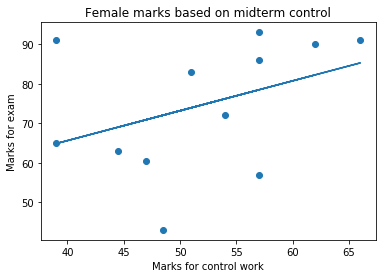

In [11]:
plt.scatter(female_data, female_results)
plt.plot(female_data, lr.predict(female_data))

plt.title('Female marks based on midterm control')
plt.xlabel('Marks for control work')
plt.ylabel('Marks for exam');

After that we can test assumptions
We will test significance of correlation with t-statistic:

$H_0: \beta_2 = 0$
$H_1: \beta_2 \neq 0$

$T(x) = \frac{\hat{\beta_j}}{\hat{\delta_{\beta_j}}}$

Approve zone: $[t_{\frac{\alpha}{2};n-k}, t_{1-\frac{\alpha}{2};n-k}]$

$k$ - number of correlators

Firstly let's find $\hat{\delta_{\beta_j}}$

In [12]:
X = np.concatenate(((np.ones((len(female_data), 1)), female_data)), axis=1)
predicted = lr.predict(female_data).T
m, n = X.shape

MSE = np.sum((predicted - female_results)**2) / (m - n)
coef_var_est = MSE * np.diag(np.linalg.pinv(np.dot(X.T,X)))
coef_SE_est = np.sqrt(coef_var_est)

b_2_est = coef_SE_est[1]
print('Std of coef of correlation before midterm:', b_2_est)

Std of coef of correlation before midterm: 0.5667705016001454


In [13]:
coef_sign = test_bidirectional(lr.coef_[0], b_2_est, 1, len(data['exam_9']), 0.05)

print('Not significant on 0.95 level' if not coef_sign else 'Significant on 0.95 level')

Not significant on 0.95 level


## Subtask 5

Now we can build another regression with 3 features

$exam = \beta_1 + \beta_2 * midterm + \gamma_1 * female + \gamma_2 * female * midterm + \epsilon$

In [14]:
feature_1 = data['midterm_9']
feature_2 = data['female_9']
feature_3 = data['female_9'] * data['midterm_9']

feature_matrix = np.stack([feature_1, feature_2, feature_3], axis=1)
lr = LinearRegression()

lr.fit(feature_matrix, data['exam_9'])

print('Best params: w = ', lr.coef_, 'b = ', lr.intercept_)

Best params: w =  [ 0.36224481 -5.63553802  0.3942078 ] b =  40.96774429889807


In [15]:
print('R^2 score: ', r2_score(lr.predict(feature_matrix), data['exam_9']))

R^2 score:  -3.119209431812865


## Subtask 6

After that we can test assumptions
We will test significance of correlation parameters with F-statistic:

$H_0: \gamma_1 = \gamma_2 = 0$
$H_1: \gamma_1^2 + \gamma_2^2 > 0$

$T(x) = \frac{RRSS - URSS}{URSS} * \frac{q}{N - k}$

$q$ - number of restrictions to be tested

$k$ - number of regressors

Approve zone: $[0, F_{1-\alpha;(q, n-k)})]$

Now let's build restricted model based on our main assumption

$exam = \beta_1 + \beta_2 * midterm + \epsilon$

In [16]:
rlr = LinearRegression()
r_train = [[sample] for sample in data['midterm_9']]

rlr.fit(r_train, data['exam_9'])
rrss = np.sum((rlr.predict(r_train) - data['exam_9'])**2)

Now we can calculate $RSS$ for unrestricted model

In [17]:
urss = np.sum((lr.predict(feature_matrix) - data['exam_9'])**2)

Finally we can build our statistic

In [18]:
statistic = ((rrss - urss) / urss) * (2 / (len(data) - 3))

print('Statistic value:', statistic)

Statistic value: 0.0038177491325521555


Our statistic is very close to the zero, so we can conclude even with out precise table, that main assumption is checked